### Importing libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as sts

### Importing data and preprocessing

In [2]:
#reading in the data and performing basic preprocessing
data = pd.read_csv('Index2018.csv')
df = data.copy #copying the dataframe
df.date = pd.to_datetime(df.date, dayfirst = True) #parsing dates
df.set_index('date', inplace = True) #setting date column as index
df.asfreq('b') #setting a constant frequency as business days
df.fillna('ffill') #filling missing or nan values

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [3]:
# keeping only ftse column and removing rest 
df['market_value'] = df.ftse
#del df['spx']
#del df['dax']
#del df['ftse']
#del df['nikkei']

#splitting the data into training and testing data
size = int(len(df)*0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [4]:
def LLR_test(model_1, model_2, DF = 1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = 2*(L2-L1)
    p = chi2.sf(LR, DF).round(3)
    return p

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#calculating returns
df_train['returns'] = (df_train.market_value.pct_change(1)*100)
df_train.head()

,spx,dax,ftse,nikkei,market_value,returns
date,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166


### ARIMA(1,1,1) model

In [7]:
model_arima_1_1_1 = ARIMA(df_train.market_value, order=(1,1,1))
results_arima_1_1_1 = model_arima_1_1_1.fit()
results_arima_1_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27571.800
Date:                Sun, 29 Jan 2023   AIC                          55149.600
Time:                        00:00:13   BIC                          55169.160
Sample:                             0   HQIC                         55156.455
                               - 5015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7463      0.059     12.739      0.000       0.631       0.861
ma.L1         -0.7925      0.053    -15.036      0.000      -0.896      -0.689
sigma2      3498.1594     40.923     85.482      0.000    3417.952    3578.367
===================================================================================
Ljung-Box (L1) (Q):                   2.54   Jarque-Bera (JB):              3327.41
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

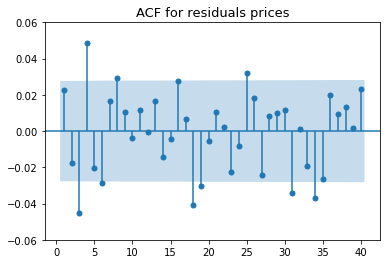

In [8]:
#checking the residuals and plotting their acf
df_train['residuals_prices'] = results_arima_1_1_1.resid
sgt.plot_acf(df_train['residuals_prices'][1:],lags = 40, zero = False)
plt.title('ACF for residuals prices',size = 13)
plt.ylim(-.06,.06)
plt.show()

### higher order arima models

In [9]:
#seeing the acf of residuals, we would like to look at the models upto ARIMA(4,1,4) i.e., total 16 models
#after checking the 16 models, only 5 seem to have all significant coefficients
model_arima_1_1_2 = ARIMA(df_train.market_value, order=(1,1,2))
results_arima_1_1_2 = model_arima_1_1_2.fit()
#results_arima_1_1_2.summary()

model_arima_1_1_3 = ARIMA(df_train.market_value, order=(1,1,3))
results_arima_1_1_3 = model_arima_1_1_3.fit()
#results_arima_1_1_3.summary()

model_arima_2_1_1 = ARIMA(df_train.market_value, order=(2,1,1))
results_arima_2_1_1 = model_arima_2_1_1.fit()
#results_arima_2_1_1.summary()

model_arima_3_1_1 = ARIMA(df_train.market_value, order=(3,1,1))
results_arima_3_1_1 = model_arima_3_1_1.fit()
#results_arima_3_1_1.summary()

model_arima_3_1_2 = ARIMA(df_train.market_value, order=(3,1,2))
results_arima_3_1_2 = model_arima_3_1_2.fit()
#results_arima_3_1_2.summary()

In [10]:
#comparing llf and aic for all 6 models
print('\nARIMA(1,1,1): \tLLR = ', results_arima_1_1_1.llf, '\tAIC = ',results_arima_1_1_1.aic)
print('\nARIMA(1,1,2): \tLLR = ', results_arima_1_1_2.llf, '\tAIC = ',results_arima_1_1_2.aic)
print('\nARIMA(1,1,3): \tLLR = ', results_arima_1_1_3.llf, '\tAIC = ',results_arima_1_1_3.aic)
print('\nARIMA(2,1,1): \tLLR = ', results_arima_2_1_1.llf, '\tAIC = ',results_arima_2_1_1.aic)
print('\nARIMA(3,1,1): \tLLR = ', results_arima_3_1_1.llf, '\tAIC = ',results_arima_3_1_1.aic)
print('\nARIMA(3,1,2): \tLLR = ', results_arima_3_1_2.llf, '\tAIC = ',results_arima_3_1_2.aic)


ARIMA(1,1,1): 	LLR =  -27571.800146910417 	AIC =  55149.60029382083

ARIMA(1,1,2): 	LLR =  -27568.32401112863 	AIC =  55144.64802225726

ARIMA(1,1,3): 	LLR =  -27559.135692221153 	AIC =  55128.271384442305

ARIMA(2,1,1): 	LLR =  -27568.04748297561 	AIC =  55144.09496595122

ARIMA(3,1,1): 	LLR =  -27560.76279729552 	AIC =  55131.52559459104

ARIMA(3,1,2): 	LLR =  -27559.266440739797 	AIC =  55130.532881479594


In [11]:
#ARIMA(1,1,3) seems to be the best model. Comparing it against it's nested models
print('\nLLR test between ARIMA(1,1,1) and ARIMA(1,1,3): ',LLR_test(model_arima_1_1_1,model_arima_1_1_3, DF = 2))
print('\nLLR test between ARIMA(1,1,2) and ARIMA(1,1,3): ',LLR_test(model_arima_1_1_2,model_arima_1_1_3, DF = 1))


LLR test between ARIMA(1,1,1) and ARIMA(1,1,3):  0.0

LLR test between ARIMA(1,1,2) and ARIMA(1,1,3):  0.0


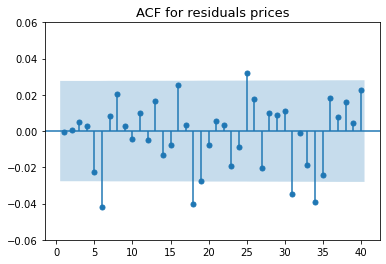

In [12]:
#ARIMA(1,1,3) outperforms both it's nested models
#checking residuals
df_train['residuals_prices'] = results_arima_1_1_3.resid
sgt.plot_acf(df_train['residuals_prices'][1:],lags = 40, zero = False)
plt.title('ACF for residuals prices',size = 13)
plt.ylim(-.06,.06)
plt.show()

In [13]:
#we see that 6th lag acf is significant and that we should consider more complex models with limit upto ARIMA(6,1,6)
#after going through all the 36 models(we already went through 16 while considering ARIMA(4,1,4)), only 2 models had all significant coefficients

model_arima_5_1_1 = ARIMA(df_train.market_value, order=(5,1,1))
results_arima_5_1_1 = model_arima_5_1_1.fit()
#results_arima_5_1_1.summary()

model_arima_6_1_3 = ARIMA(df_train.market_value, order=(6,1,3))
results_arima_6_1_3 = model_arima_6_1_3.fit()
#results_arima_6_1_3.summary()

In [14]:
#comparing llf and aic with ARIMA(1,1,3)
print('\nARIMA(1,1,3): \tLLR = ', results_arima_1_1_3.llf, '\tAIC = ',results_arima_1_1_3.aic)
print('\nARIMA(5,1,1): \tLLR = ', results_arima_5_1_1.llf, '\tAIC = ',results_arima_5_1_1.aic)
print('\nARIMA(6,1,3): \tLLR = ', results_arima_6_1_3.llf, '\tAIC = ',results_arima_6_1_3.aic)


ARIMA(1,1,3): 	LLR =  -27559.135692221153 	AIC =  55128.271384442305

ARIMA(5,1,1): 	LLR =  -27555.130359993513 	AIC =  55124.260719987025

ARIMA(6,1,3): 	LLR =  -27552.057399570378 	AIC =  55124.114799140756


In [15]:
#ARIMA(6,1,3) seems the best but we need to reaffirm this notion by performing the LLR test
print('\nLLR test between ARIMA(5,1,1) and ARIMA(6,1,3): ',LLR_test(model_arima_5_1_1,model_arima_6_1_3, DF = 3))
print('\nLLR test between ARIMA(1,1,3) and ARIMA(6,1,3): ',LLR_test(model_arima_1_1_3,model_arima_6_1_3, DF = 5))


LLR test between ARIMA(5,1,1) and ARIMA(6,1,3):  0.105

LLR test between ARIMA(1,1,3) and ARIMA(6,1,3):  0.015


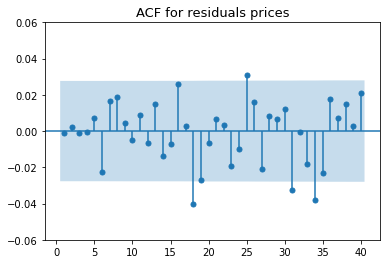

In [16]:
#ARIMA(6,1,3) fails the LLR_test against ARIMA(5,1,1). Hence, ARIMA(5,1,1) is selected
#checking the residuals
df_train['residuals_prices'] = results_arima_5_1_1.resid
sgt.plot_acf(df_train['residuals_prices'][1:],lags = 40, zero = False)
plt.title('ACF for residuals prices',size = 13)
plt.ylim(-.06,.06)
plt.show()

### arima models with higher levels of integration

In [17]:
#manually creating an integrated version of the original prices column
df_train['delta_prices'] = df_train['market_value'].diff(1)

#performing adfuller test
sts.adfuller(df_train.delta_prices[1:])

(-32.2800784222985,
 0.0,
 5,
 5008,
 {'1%': -3.431656440695734,
  '5%': -2.862117305719603,
  '10%': -2.5670773004997116},
 54782.27783482279)

In [18]:
#since our time series becomes stationary after 1 layer of integration, we don't need further layers of integration

### ARIMAX model

In [19]:
model_arimax_spx = ARIMA(df_train.market_value, order = (1,1,1), exog = df_train['spx'])
results_arimax_spx = model_arimax_spx.fit()
results_arimax_spx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5015
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26660.772
Date:                Sun, 29 Jan 2023   AIC                          53329.544
Time:                        00:01:45   BIC                          53355.624
Sample:                             0   HQIC                         53338.684
                               - 5015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6932      0.035     76.440      0.000       2.624       2.762
ar.L1          0.2528      0.029      8.657      0.000       0.196       0.310
ma.L1         -0.5425      0.025    -21.607      0.000      -0.592      -0.493
sigma2      2432.4029     27.344     88.955      0.000    2378.809    2485.997
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              4431.67
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### SARIMAX

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [21]:
model_sarimax = SARIMAX(df_train.market_value, exog = df_train.spx, order = (1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5015
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26678.450
Date:                           Sun, 29 Jan 2023   AIC                          53370.900
Time:                                   00:22:34   BIC                          53416.542
Sample:                                        0   HQIC                         53386.895
                                          - 5015                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.7043      0.035     76.307      0.000       2.635       2.774
ar.L1          0.9997      0.001   1919.562      0.000       0.999       1.001
ma.L1         -0.3104      0.009    -32.680      0.000      -0.329      -0.292
ar.S.L5        0.9640      0.013     71.521      0.000       0.938       0.990
ar.S.L10       0.0356      0.010      3.463      0.001       0.015       0.056
ma.S.L5       -0.9993      0.010   -102.565      0.000      -1.018      -0.980
sigma2      2441.8856     28.768     84.882      0.000    2385.502    2498.270
===================================================================================
Ljung-Box (L1) (Q):                   1.49   Jarque-Bera (JB):              4179.64
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
model_sarimax = ARIMA(df_train.market_value, exog = df_train.spx, order = (1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                    market_value   No. Observations:                 5015
Model:             ARIMA(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26676.271
Date:                         Sun, 29 Jan 2023   AIC                          53368.541
Time:                                 00:23:18   BIC                          53420.703
Sample:                                      0   HQIC                         53386.820
                                        - 5015                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1514.1482    588.389      2.573      0.010     360.927    2667.369
spx            2.7167      0.035     76.712      0.000       2.647       2.786
ar.L1          0.9988      0.001    991.464      0.000       0.997       1.001
ma.L1         -0.3116      0.010    -32.714      0.000      -0.330      -0.293
ar.S.L5        0.9576      0.031     30.903      0.000       0.897       1.018
ar.S.L10       0.0352      0.010      3.425      0.001       0.015       0.055
ma.S.L5       -0.9920      0.029    -33.639      0.000      -1.050      -0.934
sigma2      2439.5998     28.779     84.770      0.000    2383.194    2496.006
===================================================================================
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):              4183.09
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""